In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor




In [2]:
df = pd.read_csv("houses_to_rent.csv")
df.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [3]:
print(f"Rows:{df.shape[0]}")
print(f"Colunms:{df.shape[1]}")

Rows:6080
Colunms:14


In [4]:
df = df.drop(df.columns[0],axis=1)

In [5]:
def missing_data(data):
    missing_data = df.isnull().sum() #total de null    
    total = missing_data.sort_values(ascending=True) #ordenação 
    percent = (missing_data / len(df.index)*100).round(2).sort_values(ascending=True) #cálculo percentual
    missing_table = pd.concat([total, percent], axis=1, keys=['Qty NaN', '% NaN'])
    return missing_table

In [6]:
missing_data(df)

,Qty NaN,% NaN
city,0,0.0
area,0,0.0
rooms,0,0.0
bathroom,0,0.0
parking spaces,0,0.0
floor,0,0.0
animal,0,0.0
furniture,0,0.0
hoa,0,0.0
rent amount,0,0.0


In [7]:
df_ = df.loc[df['city'] == 1]
df_.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"
5,1,13,1,1,0,2,acept,not furnished,R$0,"R$2,200",R$42,R$28,"R$2,270"


In [8]:
df_['floor'].replace('-',0,inplace=True)

for col in ['hoa', 'rent amount', 'property tax', 'fire insurance', 'total']:
    df_[col].replace('R\$','',regex=True,inplace=True)
    df_[col].replace(',','',regex=True,inplace=True)

df_['hoa'].replace('Sem info', 0,inplace=True)
df_['hoa'].replace('Incluso', 0,inplace=True)
df_['property tax'].replace('Incluso', 0,inplace=True)


C:\Users\MichelinJV\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [9]:
def categorical(df, col):
    c = pd.Categorical(df[col])
    return c.codes

df_['animal'] = categorical(df_, 'animal')
df_['furniture'] = categorical(df_,'furniture')

ipykernel_launcher:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ipykernel_launcher:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [10]:
df_.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,0,0,0,0,8000,1000,121,9121
2,1,443,5,5,4,3,0,0,4172,7000,1417,89,12680
3,1,73,2,2,1,12,0,1,700,1250,150,16,2116
4,1,19,1,1,0,0,1,1,0,1200,41,16,1257
5,1,13,1,1,0,2,0,1,0,2200,42,28,2270


In [11]:
df_.dtypes

city               int64
area               int64
rooms              int64
bathroom           int64
parking spaces     int64
floor             object
animal              int8
furniture           int8
hoa               object
rent amount       object
property tax      object
fire insurance    object
total             object
dtype: object

In [12]:
df_ = df_.astype(np.int64)

In [13]:
y = df_['rent amount']
X = df_.drop(['rent amount','total'], axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [15]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [16]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

dt_regressor = DecisionTreeRegressor(max_depth=4)
dt_regressor.fit(X_train,y_train)

ab_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=300, random_state=0)
ab_regressor.fit(X_train,y_train)

print("Linear Score: " + str(linear_model.score(X_train,y_train)))
print("Tree Score: " + str(dt_regressor.score(X_train,y_train)))
print("AdaBoost Score: " + str(ab_regressor.score(X_train,y_train)))

Linear Score: 0.9761872774497381
Tree Score: 0.9708888236995452
AdaBoost Score: 0.9346172133226536


In [18]:
def plot_feature_importance(feature_importances, title, feature_names):
    # Normaliza os valores importantes
    feature_importances = 100.0 * (feature_importances/max(feature_importances))

    # Classifica os valores do índice e inverte-os para ficarem dispostos 
    # em ordem decrescente de importância
    index_sorted = np.flipud(np.argsort(feature_importances))

    # Centraliza a localização das variáveis no eixo x
    pos = np.arange(index_sorted.shape[0])

    # Desenha o gráfico de barras
    plt.figure(figsize=(8,6))
    plt.bar(pos,feature_importances[index_sorted],align='center')
    plt.xticks(pos, feature_names[index_sorted],rotation=45)
    plt.ylabel("Importância Relativa")
    plt.title(title)
    plt.tight_layout()
    plt.show()     

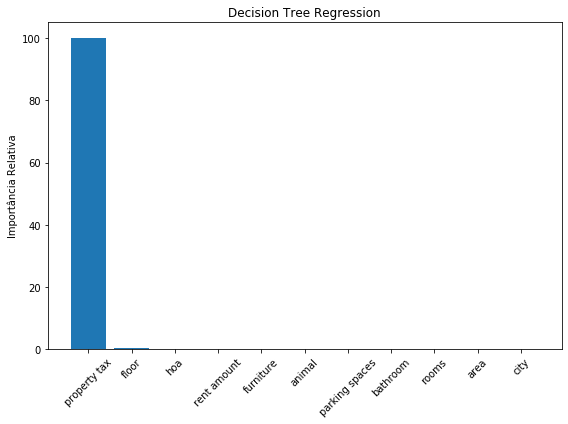

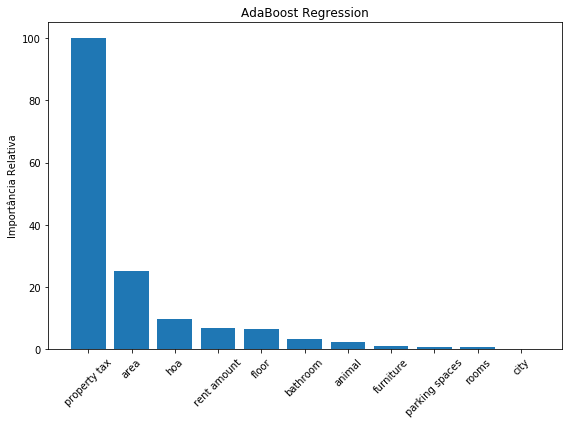

In [19]:
plot_feature_importance(dt_regressor.feature_importances_, "Decision Tree Regression", df_.columns)
plot_feature_importance(ab_regressor.feature_importances_, "AdaBoost Regression", df_.columns)

In [17]:
linear_pred = linear_model.predict(X_test)
dt_pred = dt_regressor.predict(X_test)
ab_pred = ab_regressor.predict(X_test)

print("Linear Mean squared error: " + str(mean_squared_error(y_test,linear_pred)))
print("Linear Explaned variance score: " + str(explained_variance_score(y_test,linear_pred)))
print()
print("Tree Mean squared error: " + str(mean_squared_error(y_test,dt_pred)))
print("Tree Explaned variance score: " + str(explained_variance_score(y_test,dt_pred)))
print()
print("AdaBoost Mean squared error: " + str(mean_squared_error(y_test,ab_pred)))
print("AdaBoost Explaned variance score: " + str(explained_variance_score(y_test,ab_pred)))


Linear Mean squared error: 1129026.5599686771
Linear Explaned variance score: 0.915027606725309

Tree Mean squared error: 283646.0842506104
Tree Explaned variance score: 0.9786441438961183

AdaBoost Mean squared error: 921734.0315194107
AdaBoost Explaned variance score: 0.951362873572509


In [20]:
predict = pd.DataFrame()

predict['Real'] = y_test
predict['Linear_Forecast'] = linear_pred.round()
predict['Tree_Forecast'] = dt_pred.round()
predict['AdaBoost_Foecast'] = ab_pred.round()

predict

,Real,Linear_Forecast,Tree_Forecast,AdaBoost_Foecast
4557,1800,2090.0,1847.0,2539.0
3986,1500,2255.0,1847.0,2746.0
35,6600,7147.0,7250.0,6737.0
5352,2500,2744.0,2565.0,3933.0
3828,1750,1999.0,1364.0,2917.0
...,...,...,...,...
5834,10000,9889.0,10339.0,9163.0
5227,4800,4878.0,4664.0,6016.0
5085,3100,3412.0,3202.0,3835.0
2049,15000,14142.0,14986.0,14113.0
